In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Fetch data from Yahoo Finance
crude_oil = yf.Ticker("CL=F")
df = pd.DataFrame(crude_oil.history(start="2023-10-31", end="2024-10-31"))

df = df.drop(columns=['Dividends','Stock Splits'])

In [5]:

# Volume Analysis
# ---------------------------
# Basic statistics on volume
average_vol = df['Volume'].mean()
max_vol = df['Volume'].max()
max_date = df['Volume'].idxmax()
vol_today = df['Volume'].iloc[-1:]

# Volume percentage comparisons
today_pct_avg = (vol_today / average_vol) * 100
today_pct_max = (vol_today / max_vol) * 100

# Rolling average of volume
roll_avg_volume = df['Volume'].rolling(window=5).mean()
df['roll_avg_5days'] = roll_avg_volume

# Volume threshold calculations
vol_std = df['Volume'].std()
high_vol_threshold = average_vol + (2 * vol_std)
high_vol_day = df[df['Volume'] > high_vol_threshold]

# 20-day moving average of volume for trend analysis
vol_20ma_volume = df['Volume'].rolling(window=20).mean()
df['roll_avg_20days'] = vol_20ma_volume
vol_last5 = vol_20ma_volume[-5:].mean()
vol_last25 = vol_20ma_volume[-25:-20].mean()
trend = "Increasing" if vol_last5 > vol_last25 else "Decreasing"

# Volume category labeling
df['Volume_Category'] = 'Normal'
df.loc[df['Volume'] > high_vol_threshold, 'Volume_Category'] = 'High'

trend


'Decreasing'

In [6]:
summary_analysis = {
    'average_volume': average_vol,
    'max_volume':  max_vol,
    'max_date': max_date,
    'volume_today': vol_today,
    'pct_today_vs_avg': today_pct_avg,
    'pct_today_vs_max': today_pct_max,
    'volume_std': vol_std,
    'high_vol_threshold': high_vol_threshold
}
summary_analysis

{'average_volume': 315253.03571428574,
 'max_volume': 668216,
 'max_date': Timestamp('2024-10-01 00:00:00-0400', tz='America/New_York'),
 'volume_today': Date
 2024-10-30 00:00:00-04:00    284795
 Name: Volume, dtype: int64,
 'pct_today_vs_avg': Date
 2024-10-30 00:00:00-04:00    90.338543
 Name: Volume, dtype: float64,
 'pct_today_vs_max': Date
 2024-10-30 00:00:00-04:00    42.620201
 Name: Volume, dtype: float64,
 'volume_std': 97726.66741528806,
 'high_vol_threshold': 510706.3705448619}

In [7]:
# Return Calculations
# ---------------------------
# Daily and log returns
daily_return = df['Close'].pct_change() * 100
log_return = np.log(df['Close'] / df['Close'].shift(1)) * 100

# Add returns to the DataFrame
df['daily_return'] = daily_return
df['log_return'] = log_return

# Correlation between volume and returns
correlation = df['Volume'].corr(df['daily_return'])

# Aggregated analysis of volume categories
volume_return_analysis = df.groupby('Volume_Category').agg({
    'daily_return': ['mean', 'std', 'count'],
    'Volume': 'mean'
})

volume_return_analysis

daily_return                         Volume
                        mean       std count           mean
Volume_Category                                            
High               -1.761476  2.925980     4  587984.500000
Normal             -0.019917  1.901558   247  310854.141129

In [8]:
# Volatility Calculations
# ---------------------------
# Rolling volatility (20-day)
daily_volatility = df['daily_return'].rolling(window=20).std()
df['daily_volatility'] = daily_volatility

# Annualized volatility
yearly_volatility = df['daily_return'].std() * np.sqrt(252)

# Daily return statistics
avg_daily_return = daily_return.mean()
std_daily_return = daily_return.std()

# Volume on Up and Down Days
# ---------------------------
up_day = df[df['daily_return'] > 0]
down_day = df[df['daily_return'] < 0]




up_day_avg = up_day['Volume'].mean()
down_day_avg = down_day['Volume'].mean()

print([yearly_volatility, avg_daily_return, std_daily_return, up_day_avg,down_day_avg])

[30.57051874046998, -0.04767065027715895, 1.9257616675600733, 299393.425, 330058.03846153844]


<Axes: xlabel='Date'>

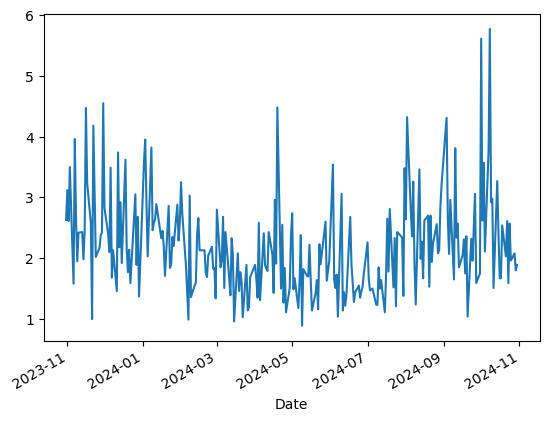

In [9]:
# Price Range Analysis
# ---------------------------
# Daily price range and percentage range
price_range = df['High'] - df['Low']
df['price_range'] = price_range
daily_range_pct = (price_range / df['Open']) * 100
df['daily_range_pct'] = daily_range_pct

# Sorting by price range and statistics
price_range_sort = df.sort_values('price_range')
avg_price_range = price_range.mean()
std_price_range = price_range.std()

# Large price range days
large_range = df[df['price_range'] > (2 * std_price_range)]

# Monthly average price range
monthly_range = df.groupby(df.index.month)['price_range'].mean()

# Seasonality in price range
df['month'] = df.index.month
winter_month = df[df['month'].isin([12, 1, 2])]
summer_month = df[df['month'].isin([6, 7, 8])]

winter_avg = winter_month['price_range'].mean()
summer_avg = summer_month['price_range'].mean()

df['price_range'].plot()

<Axes: xlabel='Date'>

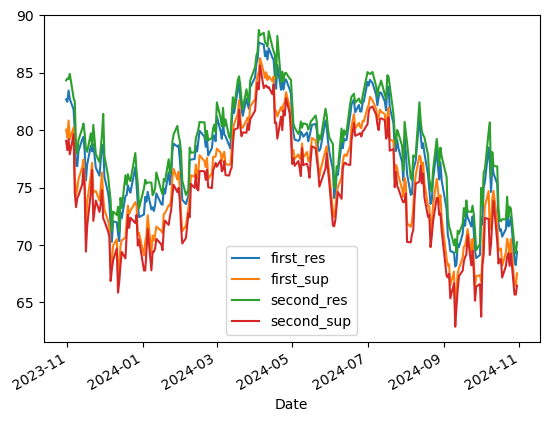

In [10]:
# Pivot Points and Support/Resistance Levels
# ---------------------------
df['pivot_point'] = (df['High'] + df['Low'] + df['Close']) / 3
df['first_res'] = (2 * df['pivot_point']) - df['Low']
df['first_sup'] = (2 * df['pivot_point']) - df['High']
df['second_res'] = df['pivot_point'] + (df['High'] - df['Low'])
df['second_sup'] = df['pivot_point'] - (df['High'] - df['Low'])

# Plot pivot points
#df[['first_res', 'first_sup']].plot()
#df[['second_res', 'second_sup']].plot()
df[['first_res', 'first_sup', 'second_res', 'second_sup']].plot()

In [113]:
# Local Highs and Lows (20-day rolling window)
# ---------------------------
df['local_high'] = df['High'].rolling(window=20, center=True).max()
df['local_low'] = df['Low'].rolling(window=20, center=True).min()

Close
(65.749, 70.371]    9795964
(70.371, 72.248]    6783275
(72.248, 73.823]    8843928
(73.823, 75.554]    7823457
(75.554, 77.045]    7929336
(77.045, 78.016]    8469383
(78.016, 78.997]    8021229
(78.997, 80.996]    6948550
(80.996, 82.802]    6980015
(82.802, 86.91]     7848628
Name: Volume, dtype: int64


C:\Users\fufuh\AppData\Local\Temp\ipykernel_5220\1584836889.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_analysis = df.groupby(price_bins)['Volume'].sum()


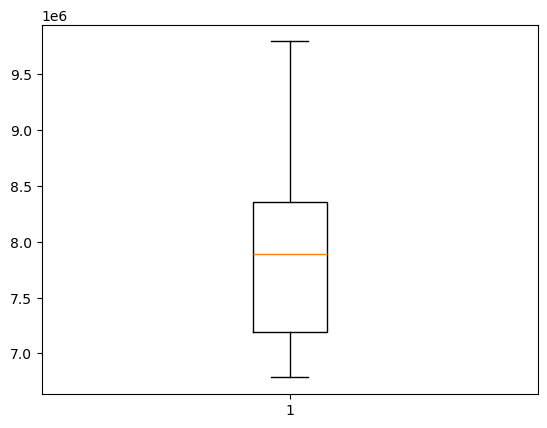

In [12]:
# Cluster Analysis by Price Bins
# ---------------------------
price_bins = pd.qcut(df['Close'], q=10)
cluster_analysis = df.groupby(price_bins)['Volume'].sum()
plt.boxplot(cluster_analysis)
print(cluster_analysis)

[0.26470141771780065, 0.3128823308305326, 0.048685835064655174, 0.5464499916466321, 93.65, 6.35, 90.07936507936508, 7.936507936507936, 1.5873015873015872]
              Gap_Filled      Days_to_Fill              Fill_Probability
                   count  sum         mean median   std                 
Gap_Direction                                                           
Down                 109   94         1.47    1.0  1.79            86.24
Up                   143  142         1.55    1.0  2.24            99.30


Average Return by Direction:
Gap_Direction
Down    0.353662
Up     -0.347229
Name: potential_return, dtype: float64



Success Rate by Return Size:
return_quintile
Smallest     78.431373
Small       100.000000
Medium      100.000000
Large        98.000000
Largest      94.000000
Name: Gap_Filled, dtype: float64


C:\Users\fufuh\AppData\Local\Temp\ipykernel_5220\3682304368.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_size = df.groupby('return_quintile')['Gap_Filled'].mean() * 100


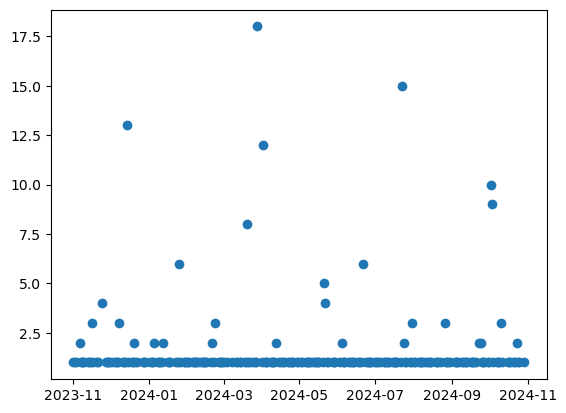

In [72]:
# Gap Analysis 
# ---------------------------

# Calculating gap size
df['Gap'] = df['Open']-df['Close'].shift(1)
df['Gap_size'] = df['Gap'].abs()

# Calculating gap percentage
df['Gap_Percentage'] = (df['Gap'] / df['Close'].shift(1)) * 100

gap_size_avg = df['Gap_size'].mean()
gap_size_std = df['Gap_size'].std()
gap_pct_avg = df['Gap_Percentage'].mean()
gap_pct_std = df['Gap_Percentage'].std()

# Filled gaps
df['Gap_Filled'] = False
for i in range(1, len(df)):
    if df['Gap'].iloc[i] > 0:  
        df.loc[df.index[i], 'Gap_Filled'] = any(df['Low'].iloc[i:] <= df['Close'].iloc[i-1])
    elif df['Gap'].iloc[i] < 0:  
        df.loc[df.index[i], 'Gap_Filled'] = any(df['High'].iloc[i:] >= df['Close'].iloc[i-1])

# Calculating how many gaps are filled
count_true = (df['Gap_Filled']).sum()
count_false = (~df['Gap_Filled']).sum()
count_all = (df['Gap_Filled']).count()
pct_filled = ((count_true/count_all)*100).round(2)
pct_not_filled = (100-pct_filled).round(2)

# Calculating z-scores
df['z-score'] = (df['Gap_Percentage'] - gap_pct_avg) / gap_pct_std

# Classify gap size
df['classify_gap'] = np.where(
    df['z-score'].isna(), np.nan,
    np.where(
        df['z-score'] < 1, 'normal',
        np.where((df['z-score'] >= 1) & (df['z-score'] < 2), 'significant',
                 np.where(df['z-score'] >= 2, 'extreme', np.nan)
                )
    )
)

# Probabilities for each category
count_small_gaps = df[df['classify_gap'] == 'normal'].shape[0]
count_medium_gaps = df[df['classify_gap'] == 'significant'].shape[0]
count_large_gaps = df[df['classify_gap'] == 'extreme'].shape[0]
count_gaps = df['classify_gap'].count()

small_gaps_pct = (count_small_gaps/count_gaps)*100
medium_gaps_pct = (count_medium_gaps/count_gaps)*100
large_gaps_pct = (count_large_gaps/count_gaps)*100

# Gap fill analysis
df['Days_to_Fill'] = np.nan

for i in range(1, len(df)):
    if df['Gap'].iloc[i] > 0:
        look_forward = min(20, len(df) - i)
        for days in range(look_forward):
            if df['Low'].iloc[i + days] <= df['Close'].iloc[i-1]:
                df.loc[df.index[i], 'Days_to_Fill'] = days + 1
                df.loc[df.index[i], 'Gap_Filled'] = True
                break
    elif df['Gap'].iloc[i] < 0:
        look_forward = min(20, len(df) - i)
        for days in range(look_forward):
            if df['High'].iloc[i + days] >= df['Close'].iloc[i-1]:
                df.loc[df.index[i], 'Days_to_Fill'] = days + 1
                df.loc[df.index[i], 'Gap_Filled'] = True
                break

# Directional analysis
df['Gap_Direction'] = np.where(df['Gap'] > 0, 'Up', 'Down')

# Calculate statistics for each direction
gap_stats = df.groupby('Gap_Direction').agg({
    'Gap_Filled': ['count', 'sum'],
    'Days_to_Fill': ['mean', 'median', 'std']
}).round(2)

# Calculate fill probabilities for each direction
gap_stats['Fill_Probability'] = (gap_stats['Gap_Filled']['sum'] / 
                               gap_stats['Gap_Filled']['count'] * 100).round(2)

print([gap_size_avg, gap_size_std, gap_pct_avg, gap_pct_std, pct_filled, pct_not_filled,small_gaps_pct,medium_gaps_pct,large_gaps_pct])

# Potential return calculation
df['potential_return'] = np.where(
    df['Gap'] > 0,
    (df['Close'].shift(1) - df['Open']) / df['Open'] * 100,  
    (df['Close'].shift(1) - df['Open']) / df['Open'] * 100
)

up_gaps = df[df['Gap'] > 0]
down_gaps = df[df['Gap'] < 0]

avg_return_by_direction = df.groupby('Gap_Direction')['potential_return'].mean()

df['return_quintile'] = pd.qcut(df['potential_return'].abs(), q=5, labels=['Smallest', 'Small', 'Medium', 'Large', 'Largest'])
success_by_size = df.groupby('return_quintile')['Gap_Filled'].mean() * 100

print(plt.scatter(df.index, df['Days_to_Fill']))
print(gap_stats)
print("\n")
print("Average Return by Direction:")
print(avg_return_by_direction)
print("\n")
print("\nSuccess Rate by Return Size:")
print(success_by_size)

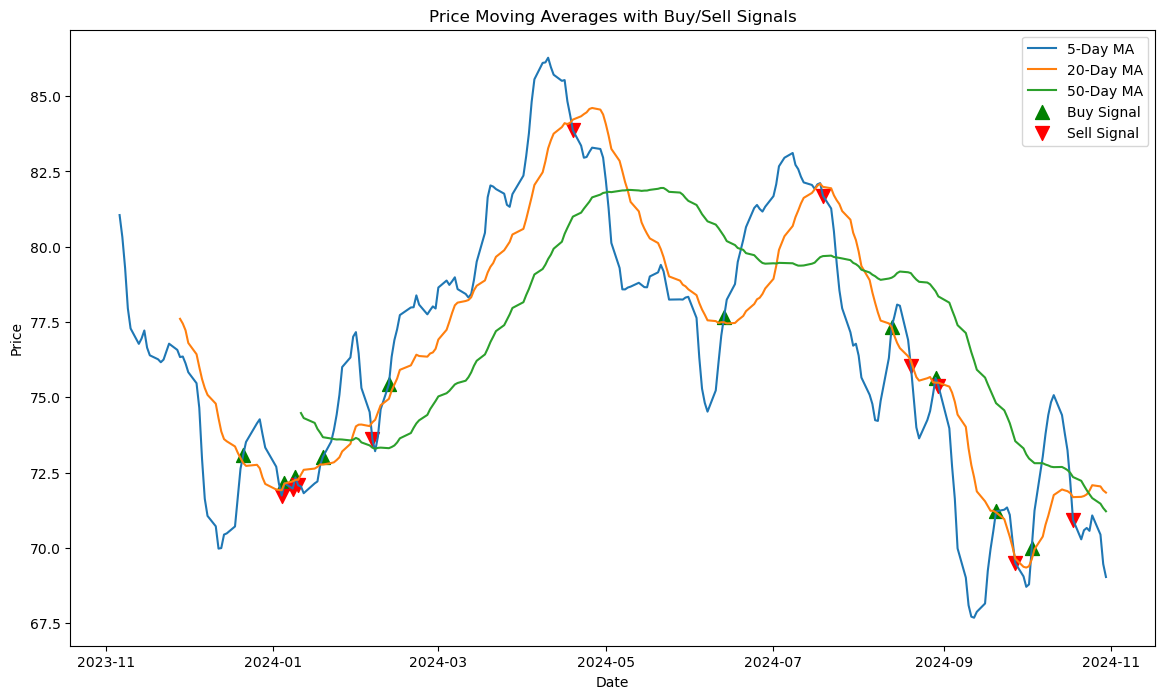

In [154]:
# Trend Analysis
# ---------------------------

# Volume Moving Averages
# Short term (5 days)
df['roll_avg_5days']
# Medium term (20 days)
df['roll_avg_20days']
# Long term (50 days)
df['roll_avg_50days'] = df['Volume'].rolling(window=50).mean()

# Price Calculations
# Average price
df['avg_price'] = (df['Open'] + df['Close'] + df['High'] + df['Low']) / 4

# Volume-Based Metrics
# VWAP (Volume Weighted Average Price)
df['VWAP'] = (df['Volume'] * df['pivot_point']).cumsum() / df['Volume'].cumsum()
# Money Flow
df['money_flow'] = df['avg_price'] * df['Volume']

# Price based moving averages
df['price_ma_5'] = df['Close'].rolling(window=5).mean()
df['price_ma_20'] = df['Close'].rolling(window=20).mean()
df['price_ma_50'] = df['Close'].rolling(window=50).mean()

# Add trend signals
df['trend_signal'] = np.where(
    df['price_ma_5'] > df['price_ma_20'], 'uptrend', 'downtrend'
)

# Bullish crossover: Short-term MA crosses above medium-term MA
df['signal'] = np.where((df['price_ma_5'] > df['price_ma_20']) & 
                        (df['price_ma_5'].shift(1) <= df['price_ma_20'].shift(1)), 'buy', 
               np.where((df['price_ma_5'] < df['price_ma_20']) & 
                        (df['price_ma_5'].shift(1) >= df['price_ma_20'].shift(1)), 'sell', 'hold'))

# Price-VWAP relationship
df['vwap_signal'] = np.where(df['Close'] > df['VWAP'], 'above_vwap', 'below_vwap')

# Optional Plotting
# Choose which metrics to plot
#df[['VWAP', 'avg_price','first_res','first_sup']].plot(title='VWAP Over Time')
#df['money_flow'].plot(title='Money Flow')
#df['pivot_point'].plot(title='Pivot Points')
#df[['roll_avg_5days', 'roll_avg_20days', 'roll_avg_50days']].plot(title='Volume Moving Averages')
#df[['price_ma_5', 'price_ma_20', 'price_ma_50','signal']].plot(title='Price Moving Averages')

plt.figure(figsize=(14, 8))
plt.plot(df['price_ma_5'], label='5-Day MA', linewidth=1.5)
plt.plot(df['price_ma_20'], label='20-Day MA', linewidth=1.5)
plt.plot(df['price_ma_50'], label='50-Day MA', linewidth=1.5)

buy_signals = df[df['signal'] == 'buy']
sell_signals = df[df['signal'] == 'sell']

plt.scatter(buy_signals.index, buy_signals['price_ma_5'], marker='^', color='green', label='Buy Signal', s=100)

plt.scatter(sell_signals.index, sell_signals['price_ma_5'], marker='v', color='red', label='Sell Signal', s=100)

plt.title('Price Moving Averages with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


In [190]:
# Candle stick analysis
# ---------------------------

# Define candlestick body and shadows
df['body'] = df['Close'] - df['Open']
df['upper_shadow'] = df['High'] - df[['Open','Close']].max(axis=1)
df['lower_shadow'] = df[['Open','Close']].min(axis=1) - df['Low']
df['bull_vs_bear'] = np.where(df['Close'] > df['Open'], 'bullish', 'bearish')

# Calculate body and shadow percentages
df['body_pct'] = (df['body'] / df['Close']) * 100
df['upper_shadow_pct'] = (df['upper_shadow'] / df['Close']) * 100
df['lower_shadow_pct'] = (df['lower_shadow'] / df['Close']) * 100

In [255]:
# Price momentum analysis
# ---------------------------

# RSI Calculation (Shortened to 5 periods for quicker signal)
rsi_period = 5
df['price_change'] = df['Close'].diff()
df['gains'] = df['price_change'].where(df['price_change'] > 0, 0)
df['losses'] = -df['price_change'].where(df['price_change'] < 0, 0)
df['avg_gain'] = df['gains'].rolling(window=rsi_period).mean()
df['avg_loss'] = df['losses'].rolling(window=rsi_period).mean()
df['rs'] = df['avg_gain'] / df['avg_loss']
df['rsi'] = 100 - (100 / (1 + df['rs']))

# ROC Calculation (Shortened to 5 periods)
roc_period = 5
df['ROC'] = ((df['Close'] - df['Close'].shift(roc_period)) / df['Close'].shift(roc_period)) * 100

# MACD Calculation (Shortened EMAs for faster signals)
macd_fast = 5  # Fast EMA
macd_slow = 15  # Slow EMA
macd_signal = 3  # Signal line EMA
df['EMA_fast'] = df['Close'].ewm(span=macd_fast, adjust=False).mean()
df['EMA_slow'] = df['Close'].ewm(span=macd_slow, adjust=False).mean()
df['MACD'] = df['EMA_fast'] - df['EMA_slow']
df['Signal_Line'] = df['MACD'].ewm(span=macd_signal, adjust=False).mean()

# VWAP Calculation
df['VWAP'] = (df['Volume'] * df['Close']).cumsum() / df['Volume'].cumsum()



Trade Analysis:
Buy Signals: 9
Sell Signals: 6
Days in Market: 21
Total Trading Days: 252

Strategy Performance Metrics:
--------------------------------------------------
Number of Trades                            15
Win Rate                                57.14%
Average Daily Return                     0.03%
Total Strategy Return                    7.35%
Buy & Hold Return                      -15.32%
Maximum Drawdown                        -6.35%
Sharpe Ratio                              0.70


<Figure size 1500x1000 with 0 Axes>

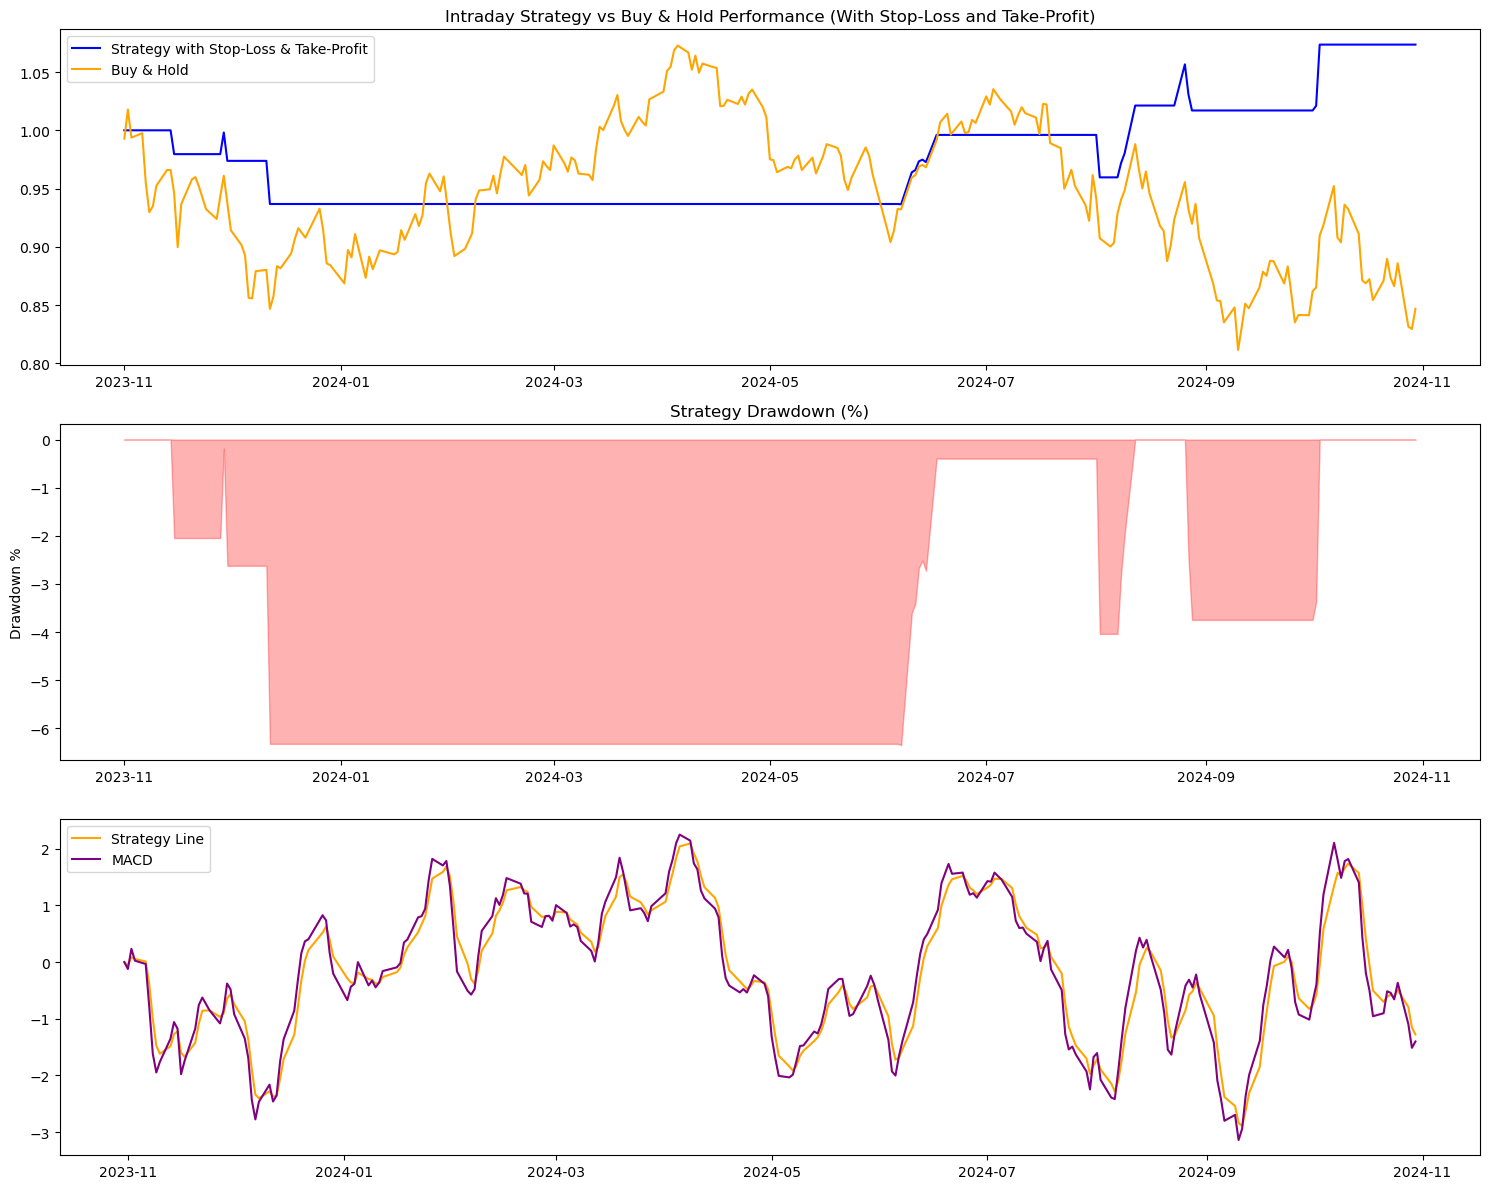

In [278]:
# Trading Strategy
# ----------------

# Reset signals
df['signal'] = np.nan
df['position'] = 0

# Define the buy and sell conditions with adjusted thresholds
buy_condition = (
    (df['rsi'] < 40) & 
    (df['MACD'] > df['Signal_Line']) 
)

sell_condition = (
    (df['rsi'] > 60) &  
    (df['MACD'] < df['Signal_Line'])
)

# Apply signals
df.loc[buy_condition, 'signal'] = 1
df.loc[sell_condition, 'signal'] = -1

# Parameters for tighter stop-loss and take-profit for intraday trading
stop_loss_pct = 0.003  
take_profit_pct = 0.05  # 1% take-profit

# Initialize entry price, stop-loss, and take-profit columns
df['entry_price'] = np.nan
df['stop_loss'] = np.nan
df['take_profit'] = np.nan

# Populate entry price and stop-loss/take-profit levels on buy signals
df.loc[df['signal'] == 1, 'entry_price'] = df['Close']
df['entry_price'] = df['entry_price'].ffill()  # Forward-fill to maintain entry price in the position

# Set stop-loss and take-profit levels
df['stop_loss'] = df['entry_price'] * (1 - stop_loss_pct)
df['take_profit'] = df['entry_price'] * (1 + take_profit_pct)

# Exit the position if stop-loss or take-profit conditions are met
df['exit_signal'] = np.where(
    (df['Close'] <= df['stop_loss']) | (df['Close'] >= df['take_profit']),
    -1,
    np.nan
)

# Update position based on signals and stop-loss/take-profit exits
df['position'] = np.where(df['signal'] == 1, 1, np.nan)  # Enter on buy signals
df['position'] = np.where((df['signal'] == -1) | (df['exit_signal'] == -1), 0, df['position'])  # Exit on sell or stop-loss/take-profit
df['position'] = df['position'].ffill().fillna(0)  # Forward-fill positions to maintain them until exit

# Calculate returns with updated exit criteria
df['strategy_return'] = df['position'].shift(1) * df['Close'].pct_change()
df['cumulative_strategy_return'] = (1 + df['strategy_return']).cumprod()
df['cumulative_buy_and_hold_return'] = (1 + df['Close'].pct_change()).cumprod()

# Trade analysis
signal_changes = df['signal'].dropna()
n_trades = len(signal_changes)
trade_returns = df['strategy_return'][df['strategy_return'] != 0]
winning_trades = len(trade_returns[trade_returns > 0])
win_rate = winning_trades / len(trade_returns) if len(trade_returns) > 0 else 0

# Risk metrics
cumulative_returns = df['cumulative_strategy_return']
running_max = cumulative_returns.expanding().max()
drawdowns = (cumulative_returns - running_max) / running_max
max_drawdown = drawdowns.min()

# Risk-adjusted returns
daily_returns_std = df['strategy_return'].std()
avg_daily_return = df['strategy_return'].mean()
sharpe_ratio = (avg_daily_return * 252) / (daily_returns_std * np.sqrt(252)) if daily_returns_std != 0 else 0

# Total returns
total_return = df['cumulative_strategy_return'].iloc[-1] - 1
buy_hold_return = df['cumulative_buy_and_hold_return'].iloc[-1] - 1

# Detailed analysis printing
print("\nTrade Analysis:")
print(f"Buy Signals: {(df['signal'] == 1).sum()}")
print(f"Sell Signals: {(df['signal'] == -1).sum()}")
print(f"Days in Market: {(df['position'] != 0).sum()}")
print(f"Total Trading Days: {len(df)}")

# Performance metrics dictionary
performance_metrics = {
    'Number of Trades': n_trades,
    'Win Rate': f'{win_rate:.2%}',
    'Average Daily Return': f'{avg_daily_return:.2%}',
    'Total Strategy Return': f'{total_return:.2%}',
    'Buy & Hold Return': f'{buy_hold_return:.2%}',
    'Maximum Drawdown': f'{max_drawdown:.2%}',
    'Sharpe Ratio': f'{sharpe_ratio:.2f}'
}

# Print metrics
print("\nStrategy Performance Metrics:")
print("-" * 50)
for metric, value in performance_metrics.items():
    print(f"{metric:<25} {value:>20}")

# Plotting cumulative returns and drawdowns
plt.figure(figsize=(15, 10))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Performance plot
ax1.plot(df.index, df['cumulative_strategy_return'], label='Strategy with Stop-Loss & Take-Profit', color='blue')
ax1.plot(df.index, df['cumulative_buy_and_hold_return'], label='Buy & Hold', color='orange')
ax1.set_title('Intraday Strategy vs Buy & Hold Performance (With Stop-Loss and Take-Profit)')
ax1.legend()

# Drawdown plot
ax2.fill_between(df.index, drawdowns * 100, 0, color='red', alpha=0.3)
ax2.set_title('Strategy Drawdown (%)')
ax2.set_ylabel('Drawdown %')

ax3.plot(df.index, df['Signal_Line'], label='Strategy Line', color='orange')
ax3.plot(df.index, df['MACD'], label='MACD', color='purple')
ax3.legend()

plt.tight_layout()
plt.show()


Close
(65.749, 70.371]    9795964
(70.371, 72.248]    6783275
(72.248, 73.823]    8843928
(73.823, 75.554]    7823457
(75.554, 77.045]    7929336
(77.045, 78.016]    8469383
(78.016, 78.997]    8021229
(78.997, 80.996]    6948550
(80.996, 82.802]    6980015
(82.802, 86.91]     7848628
Name: Volume, dtype: int64

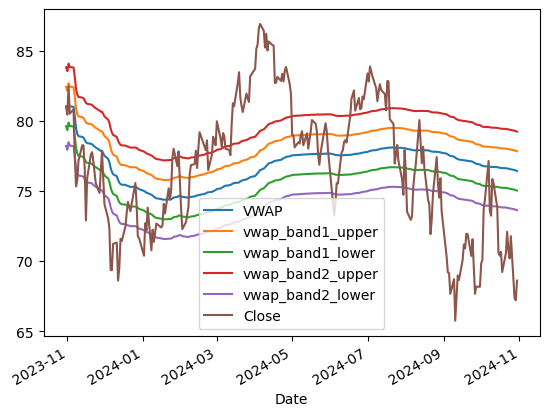

In [298]:
# Volume Analysis 
# ---------------

vwap_std = df['VWAP'].std()
df['vwap_band1_upper'] = df['VWAP'] + vwap_std
df['vwap_band1_lower'] = df['VWAP'] - vwap_std
df['vwap_band2_upper'] = df['VWAP'] + (2 * vwap_std)
df['vwap_band2_lower'] = df['VWAP'] - (2 * vwap_std)

df[['VWAP','vwap_band1_upper','vwap_band1_lower','vwap_band2_upper','vwap_band2_lower','Close']].plot()


cluster_analysis